### Non-Spark Implementation
---

In [5]:
!ls ../../Data

Test-label-28x28.csv  Train-label-28x28.csv


In [10]:
# Read in data
import pandas as pd

base = '../../Data'
train = pd.read_csv('{}/Train-label-28x28.csv'.format(base), header=None)
test = pd.read_csv('{}/Test-label-28x28.csv'.format(base), header=None)

In [17]:
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

In [22]:
# Find evaluation statistics
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(knn.score(X_test, y_test))
print(classification_report(y_test, predictions, digits=4))

0.906
             precision    recall  f1-score   support

          0     0.8936    0.9882    0.9385        85
          1     0.8182    1.0000    0.9000       126
          2     1.0000    0.7414    0.8515       116
          3     0.9327    0.9065    0.9194       107
          4     0.9266    0.9182    0.9224       110
          5     0.9634    0.9080    0.9349        87
          6     0.9222    0.9540    0.9379        87
          7     0.8505    0.9192    0.8835        99
          8     0.9481    0.8202    0.8795        89
          9     0.8866    0.9149    0.9005        94

avg / total     0.9127    0.9060    0.9051      1000



In [23]:
# Find evaluation statistics
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(knn.score(X_test, y_test))
print(classification_report(y_test, predictions, digits=4))

0.916
             precision    recall  f1-score   support

          0     0.9121    0.9765    0.9432        85
          1     0.8936    1.0000    0.9438       126
          2     0.9899    0.8448    0.9116       116
          3     0.9515    0.9159    0.9333       107
          4     0.9167    0.9000    0.9083       110
          5     0.9310    0.9310    0.9310        87
          6     0.8936    0.9655    0.9282        87
          7     0.8990    0.8990    0.8990        99
          8     0.9342    0.7978    0.8606        89
          9     0.8529    0.9255    0.8878        94

avg / total     0.9187    0.9160    0.9154      1000



In [ ]:
# Apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=data_df['train_features'].shape[1])

data_df_pca = data_df.copy()
data_df_pca['train_features'] = pca.fit_transform(data_df['train_features'])
data_df_pca['test_features'] = pca.transform(data_df['test_features'])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(pca.explained_variance_ratio_)
plt.show()

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

# Find number of PC that capture 95% of variance
pc_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95)
pc_90 = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.90)

print('Number of principal components that capture 95% of variance: {}'.format(pc_95))
print('Number of principal components that capture 90% of variance: {}'.format(pc_90))

In [5]:
# Re-transform data so 95% of varaince is captured
data_df_pca['train_features'] = data_df_pca['train_features'][:, :pc_95]
data_df_pca['test_features'] = data_df_pca['test_features'][:, :pc_95]

In [113]:
# Find optimal k value
from sklearn.neighbors import KNeighborsClassifier

k_scores = []

for k_val in list(range(1, 10, 1)):
    knn = KNeighborsClassifier(n_neighbors=k_val, metric='cosine')
    knn.fit(data_df_pca['train_features'], data_df_pca['train_labels'])
    k_scores.append(knn.score(data_df_pca['test_features'], data_df_pca['test_labels']))

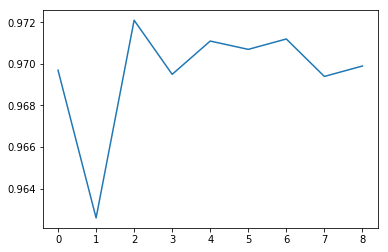

In [114]:
plt.plot(k_scores); plt.show()

In [ ]:
np.save('knn-neighbors-scores.npy', np.array(k_scores))

In [13]:
# Find evaluation statistics
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=2, metric='cosine')
knn.fit(data_df_pca['train_features'], data_df_pca['train_labels'])
predictions = knn.predict(data_df_pca['test_features'])

statistics = classification_report(data_df_pca['test_labels'], predictions)

In [15]:
print(statistics)

             precision    recall  f1-score   support

          0       0.94      1.00      0.97       980
          1       0.95      1.00      0.97      1135
          2       0.97      0.97      0.97      1032
          3       0.94      0.97      0.95      1010
          4       0.96      0.97      0.96       982
          5       0.96      0.95      0.95       892
          6       0.99      0.98      0.98       958
          7       0.96      0.96      0.96      1027
          8       0.99      0.91      0.95       974
          9       0.98      0.92      0.95      1009

avg / total       0.96      0.96      0.96      9999

